# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
import pandas as pd

cancer_surgery_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
               names = ["Age", "Operation Year", "Nodules Found",
                        "Survival Status"]) # No header, attribute lookup +added 
 
cancer_surgery_data.head()


,Age,Operation Year,Nodules Found,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
cancer_surgery_data.describe() # expected 306 values, got them.

,Age,Operation Year,Nodules Found,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
cancer_surgery_data.isnull().values.any() # True if missing values



False

In [0]:
pass1_replaced_data  = cancer_surgery_data.replace(
    {'Survival Status' : { 1 : 0}}) 

# normally I would do both at the same time, but due to the overlapping values I made one change at a time


In [0]:
pass2_replaced_data = pass1_replaced_data.replace(to_replace=2, value=1)

In [7]:
pass2_replaced_data.head(10) 
# imported, validated, assigned header, and standardized encoding 

,Age,Operation Year,Nodules Found,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,1,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,1
8,34,66,9,1
9,34,58,30,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [8]:
cancer_data_std_dev = pass2_replaced_data.std()

'''
Age                10.803452
Operation Year      3.249405
Nodules Found       7.212359
Survival Status     0.441899
'''

cancer_data_mad = pass2_replaced_data.mad();
'''
Age                8.865180
Operation Year     2.787005
Nodules Found      4.826733
Survival Status    0.389273 
'''

cancer_data_median = pass2_replaced_data.median()
'''
Age                52.0
Operation Year     63.0
Nodules Found       1.0
Survival Status     0.0
'''
cancer_data_mean = pass2_replaced_data.mean()
'''
Age                52.457516
Operation Year     62.852941
Nodules Found       3.960784
Survival Status     0.264706
'''


describe_cleaned_data = pass2_replaced_data.describe(percentiles=[
    .20, .40, .60, .80])

print(describe_cleaned_data)

              Age  Operation Year  Nodules Found  Survival Status
count  306.000000      306.000000     306.000000       306.000000
mean    52.457516       62.852941       3.960784         0.264706
std     10.803452        3.249405       7.212359         0.441899
min     30.000000       58.000000       0.000000         0.000000
20%     42.000000       59.000000       0.000000         0.000000
40%     49.000000       62.000000       0.000000         0.000000
50%     52.000000       63.000000       1.000000         0.000000
60%     55.000000       64.000000       1.000000         0.000000
80%     62.000000       66.000000       7.000000         1.000000
max     83.000000       69.000000      52.000000         1.000000


In [9]:
binned_age = pd.cut(pass2_replaced_data['Age'], bins=7)
sorted_age_bins = binned_age.sort_index()
survived = pass2_replaced_data['Survival Status']

# finds the frequency of survival/vs non survival in age bins. conv to percents
age_crosstabbed_survival = pd.crosstab(sorted_age_bins, survived, normalize = 
                                      'index')

print(age_crosstabbed_survival) 

Survival Status          0         1
Age                                 
(29.947, 37.571]  0.916667  0.083333
(37.571, 45.143]  0.738462  0.261538
(45.143, 52.714]  0.701493  0.298507
(52.714, 60.286]  0.726027  0.273973
(60.286, 67.857]  0.700000  0.300000
(67.857, 75.429]  0.782609  0.217391
(75.429, 83.0]    0.500000  0.500000


In [29]:
sorted_age_bins.value_counts()

(52.714, 60.286]    73
(45.143, 52.714]    67
(37.571, 45.143]    65
(60.286, 67.857]    50
(29.947, 37.571]    24
(67.857, 75.429]    23
(75.429, 83.0]       4
Name: Age, dtype: int64

In [10]:
binned_nodules = pd.cut(pass2_replaced_data['Nodules Found'], bins=7)
sorted_nodule_bins = binned_nodules.sort_index()

nodules_crosstabbed_survival = pd.crosstab(sorted_nodule_bins, survived, 
                                          normalize = 'index')

print(nodules_crosstabbed_survival) # looks like you really do not want to find
# more than 7 nodules :/

Survival Status          0         1
Nodules Found                       
(-0.052, 7.429]   0.796000  0.204000
(7.429, 14.857]   0.483871  0.516129
(14.857, 22.286]  0.466667  0.533333
(22.286, 29.714]  0.333333  0.666667
(29.714, 37.143]  0.500000  0.500000
(37.143, 44.571]  0.000000  0.000000
(44.571, 52.0]    0.500000  0.500000


In [11]:
binned_operation = pd.cut(pass2_replaced_data['Operation Year'], bins=5)
sorted_operations_bins = binned_operation.sort_index()

operation_crosstabbed_survival = pd.crosstab(sorted_operations_bins, survived, 
                                          normalize = 'index')

print(operation_crosstabbed_survival)

Survival Status         0         1
Operation Year                     
(57.989, 60.2]   0.725275  0.274725
(60.2, 62.4]     0.795918  0.204082
(62.4, 64.6]     0.737705  0.262295
(64.6, 66.8]     0.660714  0.339286
(66.8, 69.0]     0.775510  0.224490


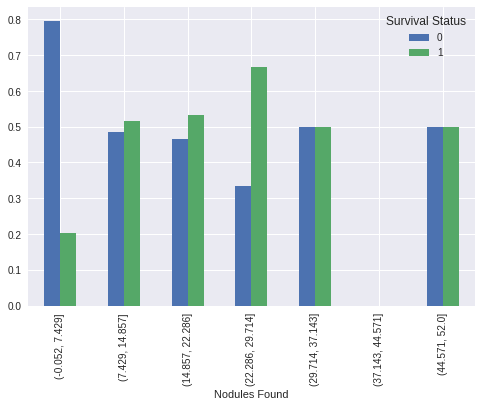

In [12]:
nodules_crosstabbed_survival.plot(kind='bar', stacked=False)


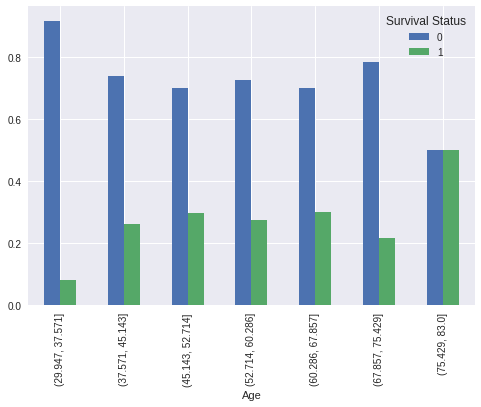

In [13]:
age_crosstabbed_survival.plot(kind='bar', stacked=False)

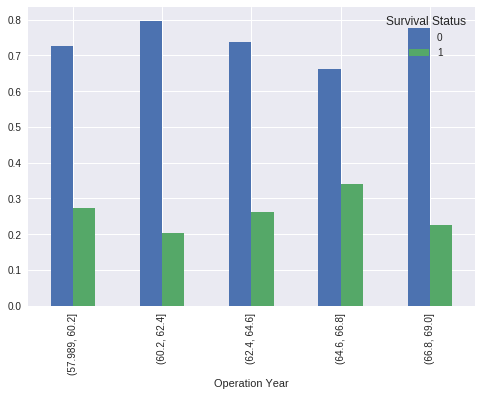

In [14]:
operation_crosstabbed_survival.plot(kind='bar', stacked=False, legend='middle')

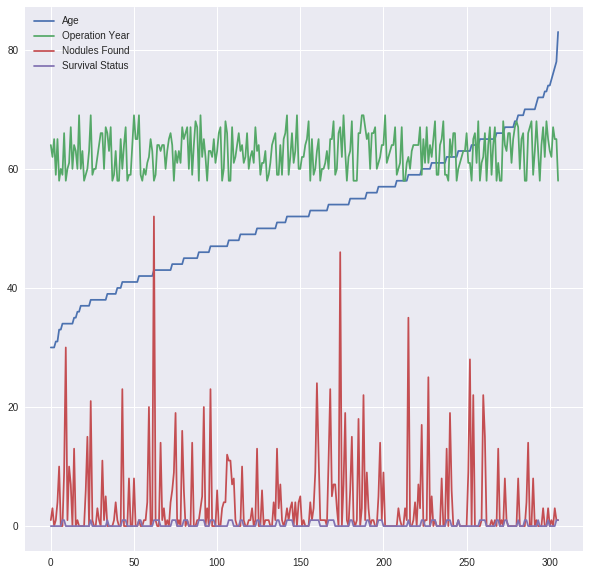

In [20]:

pass2_replaced_data.plot(kind='line', figsize=(10, 10));

# hard to read, but informative!

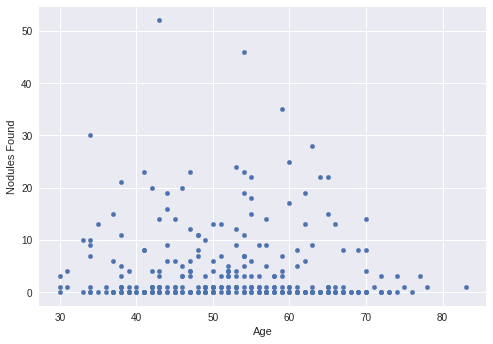

In [23]:
pass2_replaced_data.plot(kind='scatter', x='Age', y='Nodules Found')

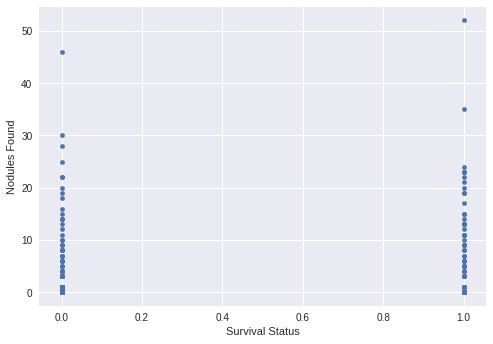

In [26]:
pass2_replaced_data.plot(kind='scatter',  x='Survival Status',y='Nodules Found')

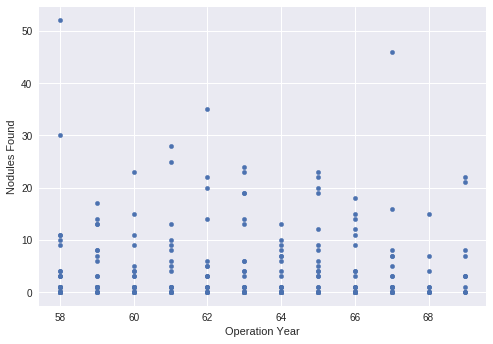

In [27]:
pass2_replaced_data.plot(kind='scatter',  x='Operation Year',y='Nodules Found')

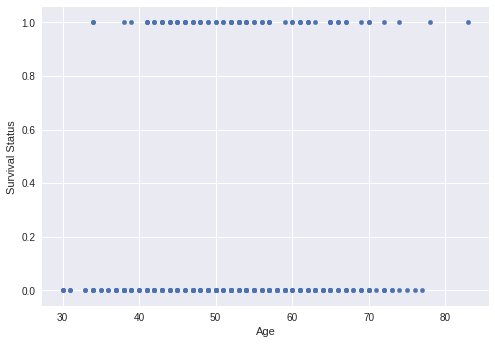

In [28]:
pass2_replaced_data.plot(kind='scatter',  x='Age',y='Survival Status')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

There are no positive correlations or maybe I do not understand the question.  As age and nodules increase the rate of survival decreases. There is even a slight negative correlation between operation year and nodules found.

- What is at least one feature that looks to have a negative correlation with survival?

See above.

- How are those two features related with each other, and what might that mean? 

The negative correlation between age and nodules found is interesting to me. You see a lower nodule rate the older you get, which I hypothesize indicates that as the frequency of nodules increases with age, they likely die before surgery.

In addition, looking at the population, it is a little under-represented as most of the population is over 40. 
Survival as a whole is more likely if surgery took place than if not, so we also have to take that into account. 
We are missing some representation of data as well. Like, of the women who survived 5 years vs not, how many of those women had a re-occurence of cancer. How many of those women had anxiety because of cancer, or depression because of lost breast tissue/identity issues. There is a lot of room for unexplained variables regarding cause of death, so the data overall has a pretty large bias.


Answer with text, but feel free to intersperse example code/results or refer to it from earlier.